# Vehicle Routing Problem - Simulated Annealing

In [60]:
import numpy as np
import pandas as pd
import random
from random import randint
import math
from copy import deepcopy

## Take input from the user
### Nodes= {Node Number:[Volume(m3), Type]}

## #Type: 
      Book Store=b
      Fish Shop=f
      Restaurant=r
      Garage=g
      Construction Company=c
      Lab=l
      Vegetables=v
      Electronics=e

In [61]:
#cap=int(input("Please enter the capacity of the garabage truck: "))
# n=int(input("Please enter the number of nodes: "))

In [62]:
# nodes={}
# for i in range (n):
#     V=int(input("Please enter the volume (m3) of the container " + str(i+1)+": "))
#     T=input("Please enter the type of the facility " + str(i+1)+": ")
#     deets=[V,T]
#     nodes[i+1]=deets

# nodes

## If input is sample

In [82]:
#Assuming vehicle capacity
vcap=95
nodes={1: [20, 'b'], 2: [15, 'b'], 3: [20, 'f'], 4: [18, 'r'], 5: [15, 'g'], 6: [20, 'c'], 7: [20, 'b'], 8: [18, 'l'], 9: [20, 'v'], 10: [20, 'c'], 11: [18, 'f'], 12: [20, 'e'], 13: [20, 'v'], 14: [15, 'r'], 15: [20, 'g'], 16: [20, 'b'], 17: [20, 'b'], 18: [20, 'f'], 19: [18, 'r'], 20: [15, 'g'], 21: [20, 'c'], 22: [20, 'b'], 23: [18, 'l'], 24: [20, 'v'], 25: [20, 'c'], 26: [18, 'r'], 27: [20, 'e'], 28: [20, 'v'], 29: [20, 'r'], 30: [20, 'g']}
nc=12
eoc=24
aht=[1,13,19,24]

In [64]:
#Read and prepare the nodes distance matrix
ndm = pd.read_csv('inputSA/nodes_dm.csv')
ndm=ndm.astype('float')
ndm=ndm.set_index('ID')
ndm=ndm.sort_values(by='ID')
ndm.columns=ndm.columns.astype('int')
fdm=ndm.sort_index(axis=1)
fdm

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
ID,,,,,,,,,,,,,,,,,,,,,
0.0,0.000000,32.747437,12.529334,12.654021,10.825414,8.614473,59.192235,25.371637,55.423005,79.362047,...,31.106042,21.141259,39.439283,91.216952,117.577630,30.707532,10.825414,97.403756,59.192235,32.747437
1.0,32.747437,0.000000,32.156861,43.333452,22.120605,38.157163,50.965857,57.952285,73.029861,104.258774,...,59.337181,15.338601,41.587676,91.017072,114.183673,62.855397,22.120605,82.287734,50.965857,0.000000
2.0,12.529334,32.156861,0.000000,23.856647,13.005697,9.166826,47.345810,29.262238,67.907708,90.566375,...,42.182193,26.067636,50.305231,78.708511,105.048381,32.757074,13.005697,85.977475,47.345810,32.156861
3.0,12.654021,43.333452,23.856647,0.000000,22.691686,15.989738,71.186638,19.262990,45.192891,66.885652,...,18.517753,29.457948,37.397436,101.181758,127.890549,25.560817,22.691686,109.690639,71.186638,43.333452
4.0,10.825414,22.120605,13.005697,22.691686,0.000000,16.370153,52.937149,35.833476,61.275740,88.073520,...,40.505678,13.104015,38.790658,88.158043,113.789014,40.789203,0.000000,90.011377,52.937149,22.120605
5.0,8.614473,38.157163,9.166826,15.989738,16.370153,0.000000,55.945606,20.625169,61.064182,81.934992,...,33.704029,28.641669,47.874945,85.224668,111.905612,24.854028,16.370153,94.757823,55.945606,38.157163
6.0,59.192235,50.965857,47.345810,71.186638,52.937149,55.945606,0.000000,72.590437,114.032846,137.856808,...,89.510818,59.761066,89.414686,40.942905,63.223998,73.364227,52.937149,38.961718,0.000000,50.965857
7.0,25.371637,57.952285,29.262238,19.262990,35.833476,20.625169,72.590437,0.000000,56.649321,68.671569,...,25.343153,46.206394,56.326025,95.503838,122.516719,6.336314,35.833476,111.476409,72.590437,57.952285
8.0,55.423005,73.029861,67.907708,45.192891,61.275740,61.064182,114.032846,56.649321,0.000000,35.830175,...,31.320499,58.328952,35.393214,146.267008,172.848109,61.770753,61.275740,151.218940,114.032846,73.029861


In [65]:
# #Read and prepare the depot distance matrix
# ddm = pd.read_csv('input/depot_dm.csv')
# ddm=ddm.astype('int')
# ddm=ddm.drop('InputID', axis=1)
# ddm=ddm.set_index('TargetID')
# ddm=ddm.sort_values(by='TargetID')
# # ndm.columns=ndm.columns.astype('int')
# # ndm=ndm.sort_index(axis=1)

In [66]:
#bifurcate dangerous, construction, general waste nodes
dan=[]
con=[]
gen=[]
for i in nodes:
    if i==nc:
        con.append(i)
    elif nodes[i][1]=='g' or nodes[i][1]=='l' or nodes[i][1]=='e':
        dan.append(i)
    elif nodes[i][1]=='c':
        con.append(i)
    else:
        gen.append(i)

## Random Feasible Solution Generator

In [67]:
#define a function to calculate the total demand of a list of nodes
def t_dem(lon):
    todem=0
    for i in lon:
        todem=todem+nodes[i][0]
    return todem

In [68]:
#define a function that finds the best possible wpf among all waste processing facilities
def all_wpf(i):
    dis=[]
    for x in range(31,35):
        dis.append(fdm[i][x] + fdm[x][0])
    short=min(dis)
    s_ind=dis.index(short)
    return(31+s_ind)

In [69]:
#define a function that finds the best possible GENERAL wpf among all general waste processing facilities between 2 points
def two_wpf(i,j):
    dis=[]
    for x in range(31,34):
        dis.append(fdm[i][x] + fdm[x][j])
    short=min(dis)
    s_ind=dis.index(short)
    return(31+s_ind)

In [70]:
#define a function that calculates the total distance of a list of nodes
def dist(route):
    td=0
    for x in range(len(route)-1):
        i=route[x]
        j=route[x+1]
        td=td+fdm[i][j]
    return td

In [71]:
#define a function that adds wpfs when both dangerous and general waste is there in the route
def add_wpf(i):
    
    #add depot at the start
    i.insert(0,0)
        
    for j in range(len(i)-1, -1, -1):
        if i[j] in dan:
            #add one wpf at the last
            i.append(34)
            i.append(0)
            
            #add other wpf at appropriate location
            for k in range (len(i)-1, -1, -1):
                if i[k] in gen:
                    gind=k
                    break
                else:
                    continue
                    
            distances=[]
            wpfs=[]
            indices=[]
            for y in range(gind,len(i)-1):
                wpf=two_wpf(i[y],i[y+1])
                td=dist(i)
                distances.append(td)
                wpfs.append(wpf)
                indices.append(y)
            
            minm=min(distances)
            mind=distances.index(minm)
            i.insert((indices[mind]+1),wpfs[mind])
                    
            break
            
        elif i[j] in gen:
            last=i[-1]
            wpf=two_wpf(last,0)
            #add one wpf at the last
            i.append(wpf)
            i.append(0)
            
             #add other wpf at appropriate location
            for k in range (len(i)-1, -1, -1):
                if i[k] in dan:
                    gind=k
                    break
                else:
                    continue
                    
            distances=[]
            indices=[]
            for y in range(gind,len(i)-1):
                wpf=two_wpf(i[y],i[y+1])
                td=dist(i)
                distances.append(td)
                indices.append(y)
            
            minm=min(distances)
            mind=distances.index(minm)
            i.insert((indices[mind]+1),34)

            break
            
        else:
            continue
    
    return(i)

In [72]:
#define a function that give times for every node of a route at a given starting point
def tw(route, start):
    t={}
    time=start
    
    #run a loop through all the nodes except the last node (depot)
    for i in range(len(route)-1):
        
        #Add Service time at node i
        if route[i]==0:
            time = time + 0
        elif route[i] in book and route[i] in aht:
            time = time + 30
        elif route[i] in aht:
            time = time + 25
        elif route[i] in book:
            time = time + 15
        else:
            time = time + 10
        
        #Add into the 't' dictionary
        t[route[i]] =time
        
        #Add the travel time from (i) to (i+1)
        time = time + ntm[route[i]][route[i+1]]
    
    t["depot2"]=time
    
    return(t)

In [73]:
#define a function to calculate the total distance travelled in a route
def tdr(route):
    td=0
    for x in range(len(route)-1):
        i=route[x]
        j=route[x+1]
        td=td+fdm[i][j]
    return td

In [74]:
#define a function to calculate the total distance travelled in a list of route
def todr(list_of_routes):
    tod=0
    for i in list_of_routes:
        tod=tod+tdr(i)
    return(tod)

In [75]:
#list of book stores and restaurants
book=[]
rest=[]
for i in nodes:
    if nodes[i][1]=='b':
        book.append(i)
    elif nodes[i][1]=='r':
        rest.append(i)
    else:
        continue

In [76]:
#Read and prepare the nodes time matrix
ntm = pd.read_csv('inputSA/nodes_tm.csv')
ntm=ntm.astype('int')
ntm=ntm.set_index('ID')
ntm=ntm.sort_values(by='ID')
ntm.columns=ntm.columns.astype('int')
ntm=ntm.sort_index(axis=1)

## Time Constraints
#### Normal time window (Departure of trucks from the depot to arrival of trucks at the depot)= 7 am to 5 pm (0-600)
#### Every customer should be served before 4 pm (< 540)
#### All the restraunts should be served before noon (< 300)
#### Dangerous waste can only be dumped between 1 pm and 4 pm (360-540)

## Time insertions
#### Service time at depot is 0 minutes
#### Service time at wpf is 10 minutes (assumption)
#### Every node except bookstores need 10 minutes (assumption) for service, book stores need 15 minutes (assumption) for service as they need the same container back
#### Additional Handeling time of 15 minutes at [aht] nodes
#### If any node except book node has an additional handeling time of 15 minutes, it will take 10+15=25 minutes
#### If a book node has an additional handeling time of 15 minutes, it will take 15+15=30 minutes

## A function that checks the feasibililty of the solutions and if feasible, gives the total distance

In [77]:
#define a function that checks the feasibility of a permutation of nodes and gives the total distance

def solution(permutation):

    #make capacitated clusters
    lor=[]
    route=[]
    for i in permutation:
        if t_dem(route) + nodes[i][0]<=vcap:
            route.append(i)
        else:
            lor.append(route)
            route=[]
            route.append(i)
    if route not in lor:
        lor.append(route)
    #return(lor)
    #add depot and wpfs at optimal locations
    for i in lor:
        
        #contains both dangerous and general waste
        
        #we will need to add 2 wpfs
        if any(n in i for n in gen)==True and any(n in i for n in dan)==True:
            add_wpf(i)       
            
        #only construction waste   
        elif any(n in i for n in gen)==False and any(n in i for n in dan)==False:
            last=i[-1]
            wpf=all_wpf(last)
            i.append(wpf)
            i.append(0)
            i.insert(0,0)
    
        #only construction or dangerous waste
        elif any(n in i for n in gen)==False:
            wpf=34
            i.append(wpf)
            i.append(0)
            i.insert(0,0)
        
        #only construction or general waste
        elif any(n in i for n in dan)==False:
            last=i[-1]
            wpf=two_wpf(last,0)
            i.append(wpf)
            i.append(0)
            i.insert(0,0)
            
    #Set start times for every route
    final=[]
    for i in lor:
        if any(n in i for n in dan)==True:
            tw1=tw(i,0)
            dand=tw1[34]
            if dand<360:
                diff=360-dand
                start2=diff
                tw2=tw(i,start2)
                final.append(tw2)
            elif dand>540:
                return ("Infeasible")
            else:
                final.append(tw1)
        else:
            final.append(tw(i,0))
    
    #Feasibility check for time of returning back to depot
    for i in final:
        if i["depot2"]>600:
            return ("Infeasible")
            
    #Feasibility check for time of serving the restraunts
    for i in final:
        for x in i.keys():
            if x in rest:
                if i[x]>300:
                    return ("Infeasible")
    return(todr(lor))

In [78]:
#define a function that gives all the routes with timimngs

def plan(permutation):

    #make capacitated clusters
    lor=[]
    route=[]
    for i in permutation:
        if t_dem(route) + nodes[i][0]<=vcap:
            route.append(i)
        else:
            lor.append(route)
            route=[]
            route.append(i)
    if route not in lor:
        lor.append(route)
    #return(lor)
    #add depot and wpfs at optimal locations
    for i in lor:
        
        #contains both dangerous and general waste
        
        #we will need to add 2 wpfs
        if any(n in i for n in gen)==True and any(n in i for n in dan)==True:
            add_wpf(i)       
            
        #only construction waste   
        if any(n in i for n in gen)==False and any(n in i for n in dan)==False:
            last=i[-1]
            wpf=all_wpf(last)
            i.append(wpf)
            i.append(0)
            i.insert(0,0)
    
        #only construction or dangerous waste
        elif any(n in i for n in gen)==False:
            wpf=34
            i.append(wpf)
            i.append(0)
            i.insert(0,0)
        
        #only construction or general waste
        elif any(n in i for n in dan)==False:
            last=i[-1]
            wpf=two_wpf(last,0)
            i.append(wpf)
            i.append(0)
            i.insert(0,0)
            
    #Set start times for every route
    final=[]
    for i in lor:
        if any(n in i for n in dan)==True:
            tw1=tw(i,0)
            dand=tw1[34]
            if dand<360:
                diff=360-dand
                start2=diff
                tw2=tw(i,start2)
                final.append(tw2)
            elif dand>540:
                return ("Infeasible")
            else:
                final.append(tw1)
        else:
            final.append(tw(i,0))
    
    #Feasibility check for time of returning back to depot
    for i in final:
        if i["depot2"]>600:
            return ("Infeasible")
            
    #Feasibility check for time of serving the restraunts
    for i in final:
        for x in i.keys():
            if x in rest:
                if i[x]>300:
                    return ("Infeasible")
    return(final)

## Perform Simulated Annealing

In [79]:
#define a function to swap positions of 2 numbers
def swap(lis):
    sam=random.sample(range(1,31),2)
    a=sam[0]
    b=sam[1]
    i=lis.index(a)
    j=lis.index(b)
    lis1=deepcopy(lis)
    lis1[i], lis1[j] = lis1[j], lis1[i]
    return (lis1)

In [86]:
#finding a good starting solution
c=5000
for i in range(10000):
    nod=list(nodes.keys())
    random.seed(i)
    random.shuffle(nod)
    if solution(nod)!="Infeasible":
        #print(i, solution(nod))
        if solution(nod)<c:
            sp=i
            c=solution(nod)
print("Starting solution seed: " + str(sp))

Starting solution seed: 4894


In [93]:
#shuffle the nodes
nod=list(nodes.keys())
random.seed(sp)
random.shuffle(nod)

In [94]:
#nod=[22, 14, 24, 16, 17, 28, 29, 19, 15, 3, 10, 25, 7, 23, 8, 9, 5, 1, 30, 20, 13, 2, 27, 6, 21, 11, 4, 18, 26, 12]
Tstart=25
Tend=0.001
alpha=0.999
R1=[nod]
#print(R1)
L1=[solution(nod)]
#print(L1)
R2=[]
L2=[]
delt=[]
Temp=[]
rand=[]
expo=[]
accept=[]
T=Tstart
#print(T)
bc=deepcopy(nod)
#print(bcnod)
#print(bcnod)
while T>Tend:
    
    L=solution(bc)
    ac=swap(bc)
    
    #get a feasible solution
    while solution(ac)=="Infeasible":
        ac=swap(ac)
    
    R2.append(ac)
    L2.append(solution(ac))
    delta=(solution(ac)-L)
    delt.append(delta)
    
    #if total distance is not increased
    if delta<=0:
        accept.append("Yes")
        rand.append("--")
        expo.append("--")
        #print(acnod)
        R1.append(ac)
        #print(R1)
        L1.append(solution(ac))
        bc=deepcopy(ac)
    
    #if total distance is increased
    else:
        r=random.uniform(0,1)
        rand.append(r)
        ex=(-2*delta)/(T*10)
        rc=math.exp(ex)
        expo.append(rc)
        
        #if random number is not more than the exponential
        if r<=rc:
            accept.append("Yes")
            L=solution(ac)
            #print(acnod)
            R1.append(ac)
            #print(R1)
            L1.append(solution(ac))
            bc=deepcopy(ac)
        
        #if random number is more than the exponential
        else:
            accept.append("No")
            #print(bcnod)
            R1.append(bc)
            #print(R1)
            L1.append(solution(bc))

    Temp.append(T)
    T=T*alpha
    
#remove last entries to keep all the lists of the same size
R1.remove(R1[-1])
L1.remove(L1[-1])

In [95]:
#make dataframe
sim_ann = pd.DataFrame(
    {'Rstart': R1,
     'L1': L1,
     'Rend': R2,
     'L2': L2,
     'delta L': delt,
     'T': Temp,
     'random': rand,
     'Expo': expo,
     'Accept?': accept
    })
sim_ann

,Rstart,L1,Rend,L2,delta L,T,random,Expo,Accept?
0,"[12, 4, 10, 15, 30, 20, 9, 23, 24, 28, 29, 19,...",1674.883222,"[1, 17, 27, 15, 26, 22, 9, 30, 5, 28, 19, 25, ...",2264.567466,589.684244,25.000000,0.484746,0.008938,No
1,"[12, 4, 10, 15, 30, 20, 9, 23, 24, 28, 29, 19,...",1674.883222,"[12, 4, 10, 15, 30, 25, 9, 23, 24, 28, 29, 5, ...",2125.082163,450.198942,24.975000,0.560657,0.027182,No
2,"[12, 4, 10, 15, 30, 20, 9, 23, 24, 28, 29, 19,...",1674.883222,"[9, 4, 10, 15, 30, 20, 12, 23, 24, 28, 29, 19,...",1719.965535,45.082314,24.950025,0.62387,0.696714,Yes
3,"[9, 4, 10, 15, 30, 20, 12, 23, 24, 28, 29, 19,...",1719.965535,"[12, 4, 10, 15, 30, 20, 9, 23, 24, 28, 29, 19,...",1674.883222,-45.082314,24.925075,--,--,Yes
4,"[12, 4, 10, 15, 30, 20, 9, 23, 24, 28, 29, 19,...",1674.883222,"[12, 26, 10, 15, 30, 20, 9, 23, 24, 28, 29, 19...",1683.672690,8.789468,24.900150,0.834696,0.931837,Yes
...,...,...,...,...,...,...,...,...,...
10117,"[5, 9, 8, 27, 11, 30, 7, 23, 1, 24, 16, 17, 18...",1184.719380,"[5, 9, 8, 27, 11, 30, 10, 23, 1, 24, 16, 17, 1...",1258.100224,73.380845,0.001005,0.977005,0.0,No
10118,"[5, 9, 8, 27, 11, 30, 7, 23, 1, 24, 16, 17, 18...",1184.719380,"[4, 15, 11, 6, 29, 9, 25, 24, 8, 23, 18, 21, 2...",2287.286215,1102.566835,0.001004,0.481476,0.0,No
10119,"[5, 9, 8, 27, 11, 30, 7, 23, 1, 24, 16, 17, 18...",1184.719380,"[5, 9, 8, 27, 11, 30, 7, 23, 1, 24, 16, 17, 18...",1273.065290,88.345911,0.001003,0.89381,0.0,No
10120,"[5, 9, 8, 27, 11, 30, 7, 23, 1, 24, 16, 17, 18...",1184.719380,"[5, 2, 8, 27, 11, 30, 7, 23, 1, 24, 16, 17, 18...",1314.049136,129.329756,0.001002,0.453271,0.0,No


In [69]:
sim_ann.to_csv('C:/Users/Amit/Desktop/OneDrive - KU Leuven/Documents/GitHub/IP1c/Simulated Annealing/inputSA/results.csv')

In [70]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

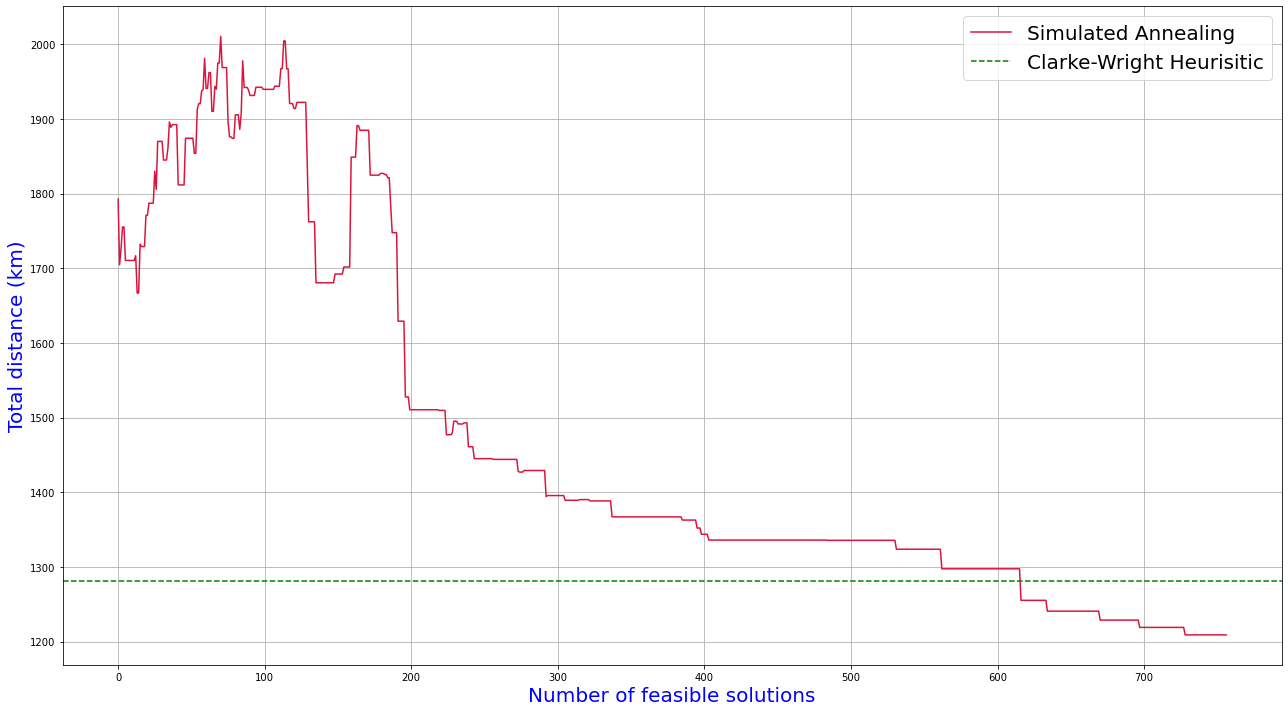

In [73]:
figure(figsize=(18, 10))
plt.plot(L1, color='crimson') #plot the data
plt.xlabel('Number of feasible solutions', color= 'b',size=20)
plt.ylabel('Total distance (km)', color= 'b', size=20)
plt.axhline(1280.558, color='g', linestyle = '--')
plt.legend(["Simulated Annealing", "Clarke-Wright Heurisitic"], fontsize=20)
plt.grid()
plt.tight_layout()
plt.savefig('compare.png',dpi=600)

In [49]:
rplan=plan(R1[-1])
for i in range(len(rplan)):
    print("Truck"+str(i+1))
    print(rplan[i])

Truck1
{0: 140, 6: 209, 15: 258, 21: 309, 34: 360, 'depot2': 393}
Truck2
{0: 0, 18: 43, 17: 78, 26: 127, 31: 150, 'depot2': 161}
Truck3
{0: 0, 28: 101, 29: 138, 19: 192, 33: 277, 'depot2': 336}
Truck4
{0: 181, 25: 222, 8: 263, 27: 308, 34: 360, 'depot2': 393}
Truck5
{0: 0, 2: 28, 11: 55, 4: 75, 31: 85, 'depot2': 96}
Truck6
{0: 279, 23: 310, 34: 360, 1: 390, 12: 416, 31: 434, 'depot2': 445}
Truck7
{0: 0, 22: 28, 14: 38, 13: 88, 31: 120, 'depot2': 131}
Truck8
{0: 0, 9: 89, 16: 145, 24: 192, 31: 242, 'depot2': 253}
Truck9
{0: 0, 7: 40, 10: 71, 3: 91, 31: 124, 'depot2': 135}
Truck10
{0: 217, 30: 258, 20: 293, 5: 312, 34: 360, 'depot2': 393}
